## PG Diploma - Machine Learning and Artifical Intelligence

# Assignment - Linear Regression - Solution

##### By: Prateek Ralhan

#### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 

The company wants to know:
* Which variables are significant in predicting the price of a car.
* How well those variables describe the price of a car 

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 

#### Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.


In [1]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
#Reading the data as a Pandas dataframe
car = pd.read_csv('CarPrice_Assignment.csv')
car.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [3]:
#gathering an overview of the database using the 'pandas_profiling' library.
car.profile_report(style={'full_width':True})

In [4]:
car.shape

(205, 26)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
car.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [7]:
# Finding the percentage of missing values for all the columns separately
round(car.isnull().sum()/len(car.index), 2)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [8]:
# Finding the duplicates(if any) and dropping them
car=car.drop_duplicates()

In [9]:
#The attribute car_ID isn't needed for the price modeling. So,we drop it.
car.drop('car_ID',axis=1,inplace=True)

In [10]:
#Function to fit Linear Regression using the statsmodels python package
def fit_LR(X_train):
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit() 
    print(lm.summary())
    return lm

In [11]:
#Function to Calculate the VIFs for the newly created model
def VIF_get(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

## Data Analysis :)

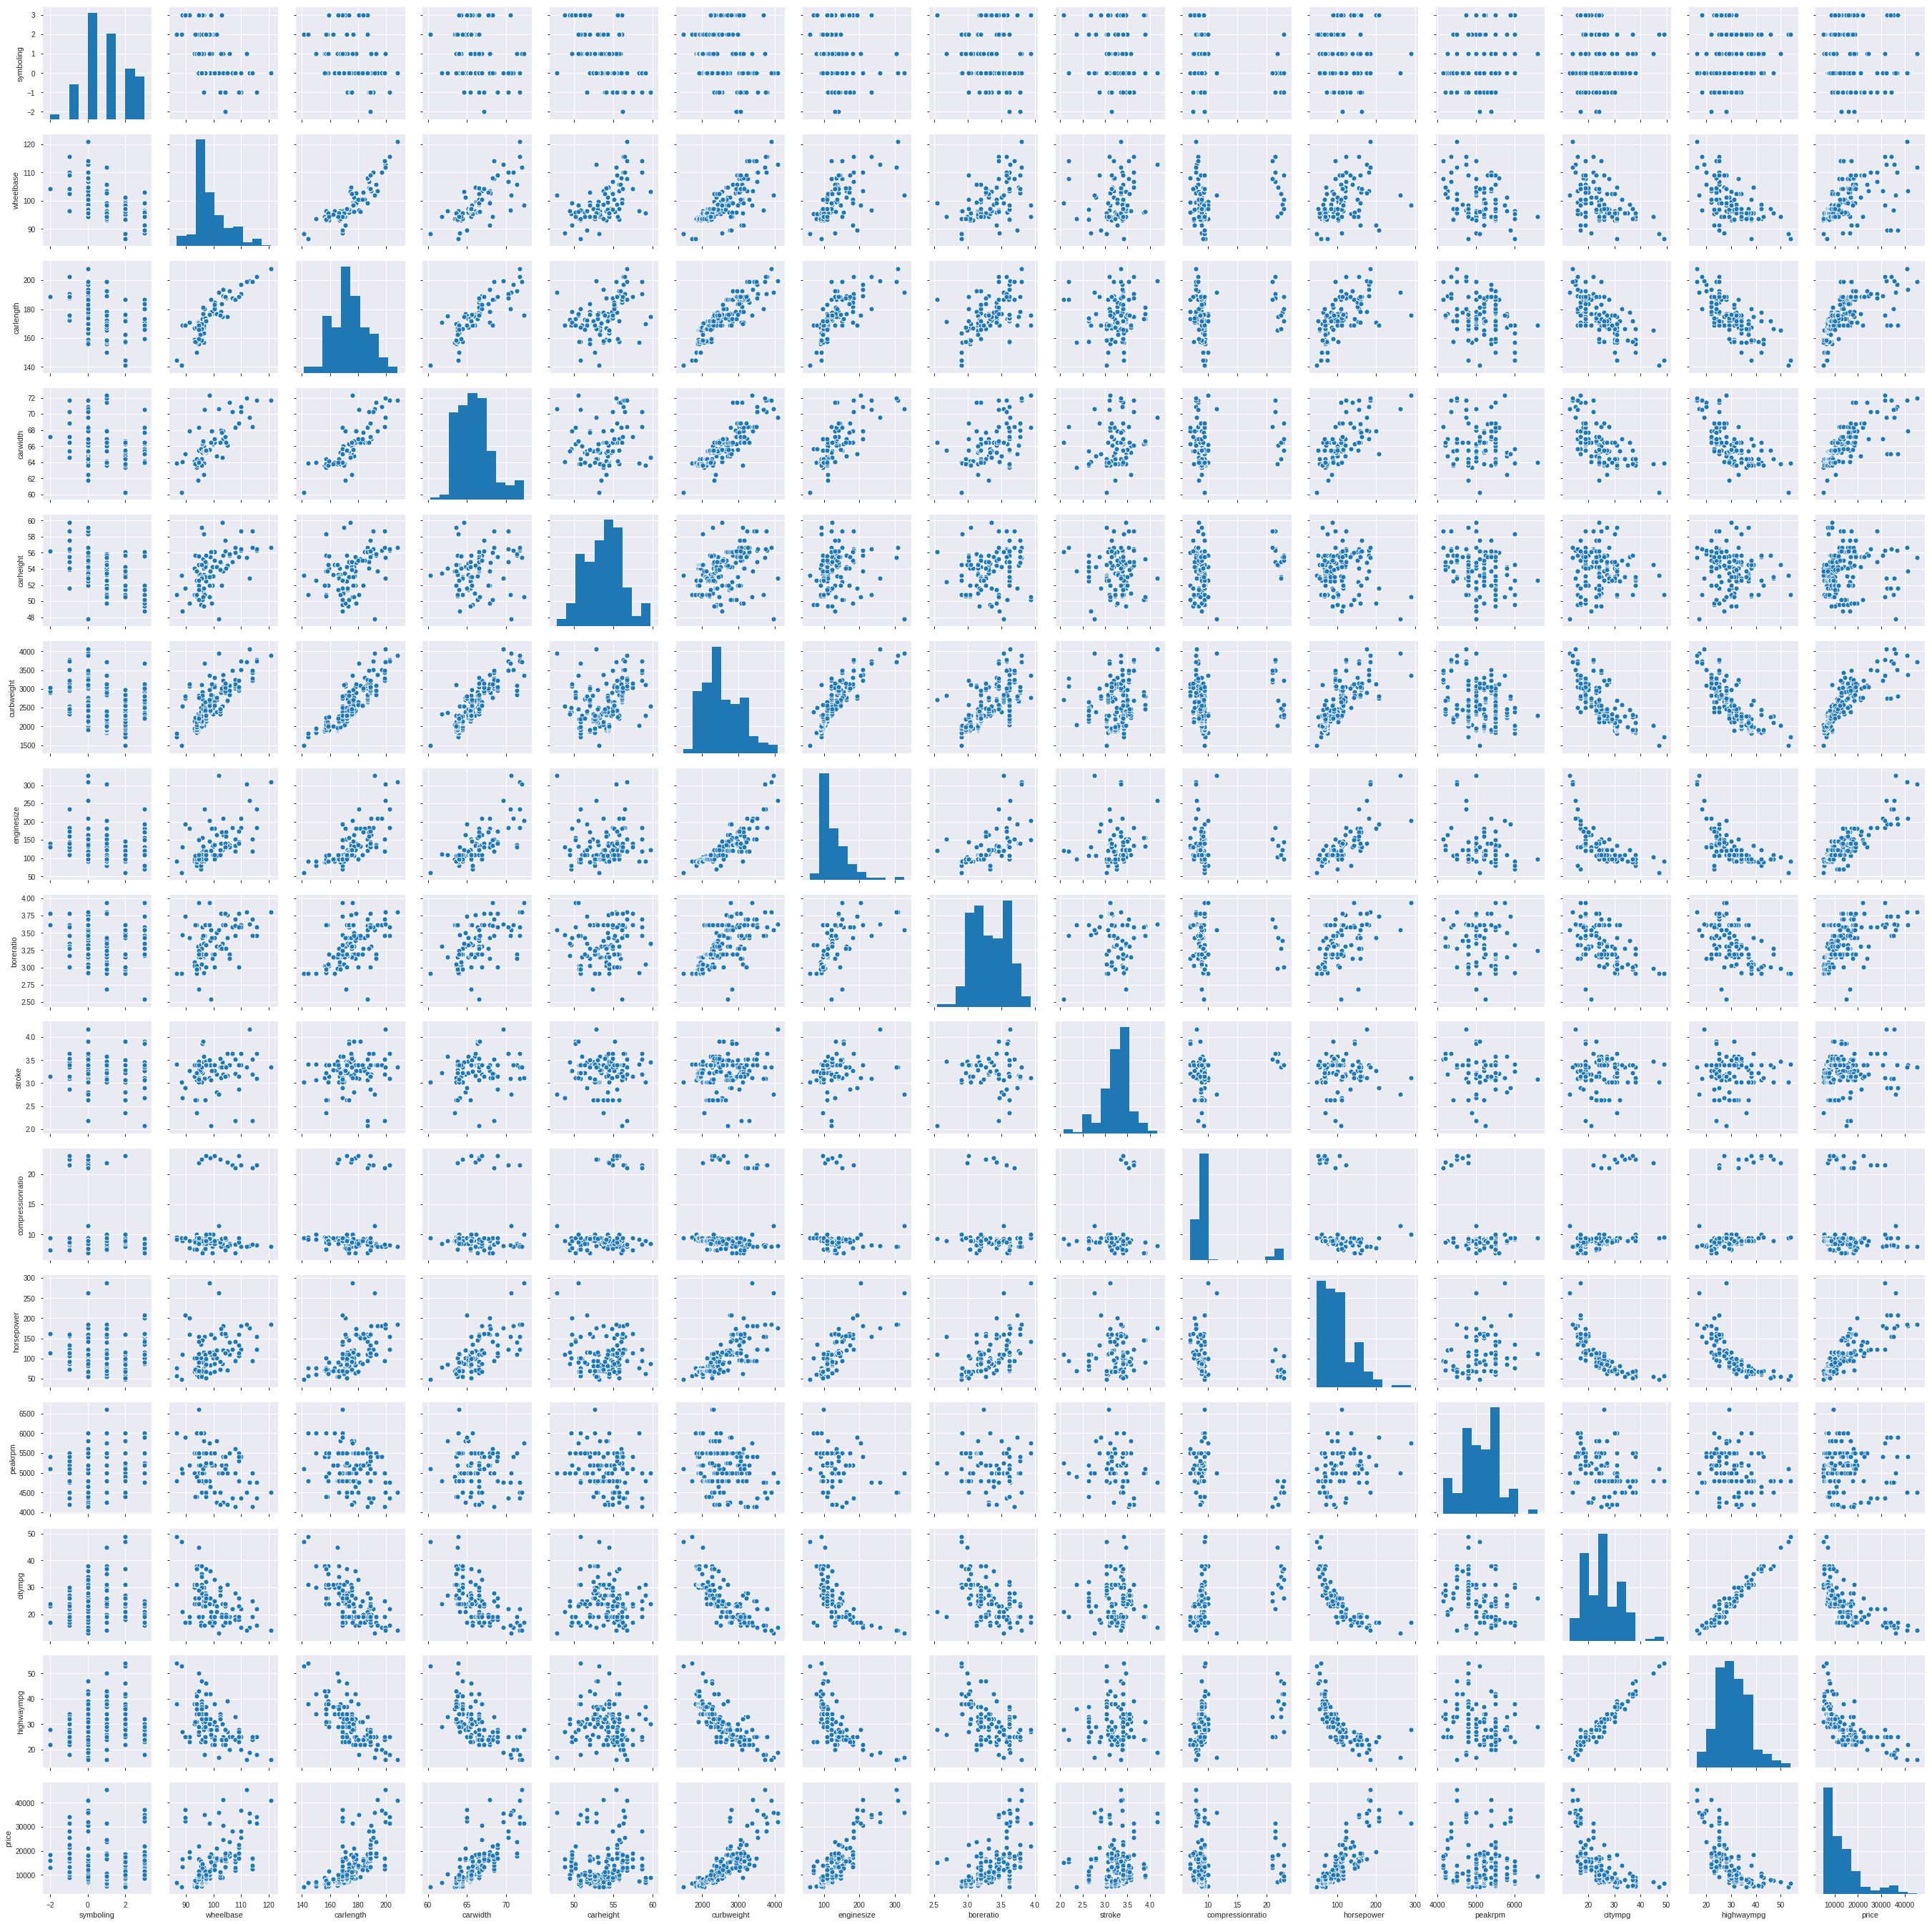

In [12]:
sns.pairplot(car)

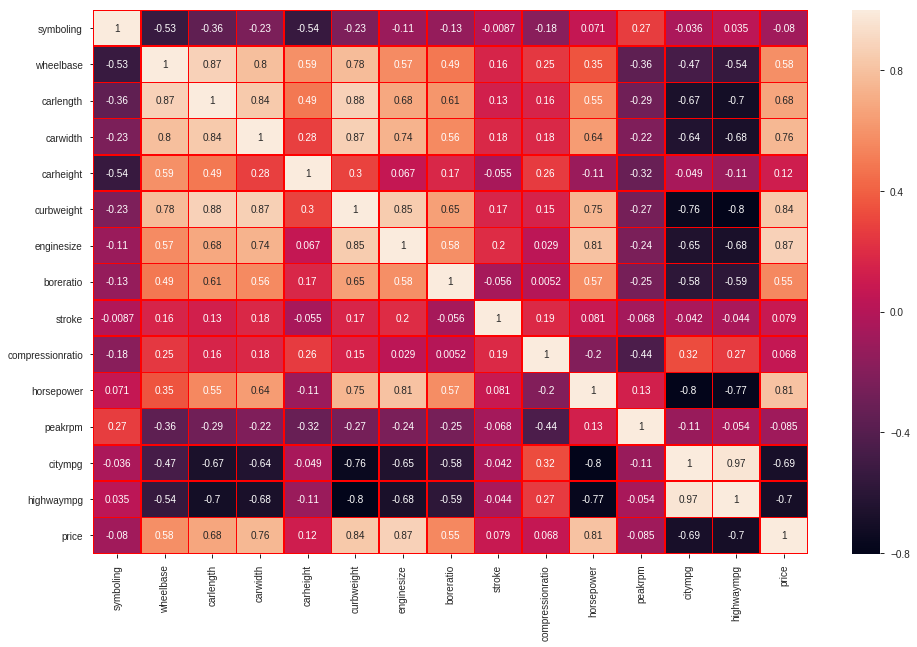

In [13]:
plt.figure(figsize = (16, 10))
sns.heatmap(car.corr(), annot = True,linewidths=0.5,linecolor='r')


Now, we can have an overall idea that which features are related to price. We observe that some features have some kind of positive relationship with *'price'*. These are given as follows:

  * <b>wheelbase</b>
  * <b>carlength</b>
  * <b>carwidth</b>
  * <b>curbweight</b>
  * <b>enginesize</b>
  * <b>boreratio</b>
  * <b>horsepower</b>
  
However, there are some attributes/variables that show a negative relationship with *price*:
  * <b>citympg</b>
  * <b>highwaympg</b>
  
We can alsoe observe some multicollinearity visible between the predictor variables:

  * <b>*carlength*</b> with <b>*wheelbase*</b>, <b>*carwidth*</b>, <b>*curbweight*</b>
  * <b>*curbweight*</b> with <b>*enginesize*</b>, <b>*carlength*</b>, <b>*carwidth*</b>, <b>*wheelbase*</b>
  * <b>*enginesize*</b> with <b>*horsepower*</b>, <b>*crubweight*</b> and dimensions of car
  * <b>*highwaympg*</b> and <b>*citympg*</b> are highly correlated (~ 0.97).

Let us observe the categorical variables present in our data.

<b>*Symboling*</b> is a categorical variable which has been considered as a numeric *int64* type variable. Let us convert the *symboling* variable.

Here Symboling is the assigned insurance risk rating - A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

Let us define the category clearly by classifying it on the basis of the risk:

  * -ve symboling as safe
  * 0, 1 as moderate
  * 2,3 as risky



In [14]:
car['symboling'] = car['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

<b>*CarName*</b> comprises of 2 parts:
* the first word is the name of <b>'car company'</b>.
* the second is the <b>'car model'</b>. 

###### For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. We need to only consider the compnay name as the independent variable for making the model.

In [15]:
car['car_company'] = car['CarName'].apply(lambda x: x.split( )[0])
car.drop('CarName',axis=1,inplace=True)

In [16]:
car['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### We notice that certain company names have been misspelled here. Let us correct them in our dataset.

In [17]:
car['car_company'].replace('maxda','mazda',inplace=True)
car['car_company'].replace('Nissan','nissan',inplace=True)
car['car_company'].replace('porcshce','porsche',inplace=True)
car['car_company'].replace('toyouta','toyota',inplace=True)
car['car_company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

In [18]:
cat_vars = list(car.columns[car.dtypes == 'object'])
cat_vars

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'car_company']

In [19]:
#Taken from https://stackoverflow.com/a/48372659 and edited it
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.



In [20]:
def plot(df,var_list, sortbyindex=False):
    #Plot the percentage of car's in the US market with respect to different car features
    #plt.figure(figsize=(20, 17))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        values = (df[var].value_counts(normalize=True)*100)
        if sortbyindex:
                values = values.sort_index()
        ax = values.plot.bar(color=sns.color_palette('bright', 16))
        ax.set_ylabel('% in dataset', fontsize=16)
        ax.set_xlabel(var, fontsize=10)
        showLabels(ax)
        

def plot_cat(var_list):
    #Function to plot a list of categorical variables together
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        sns.boxplot(x = var, y = 'price', data = car)
    plt.show()

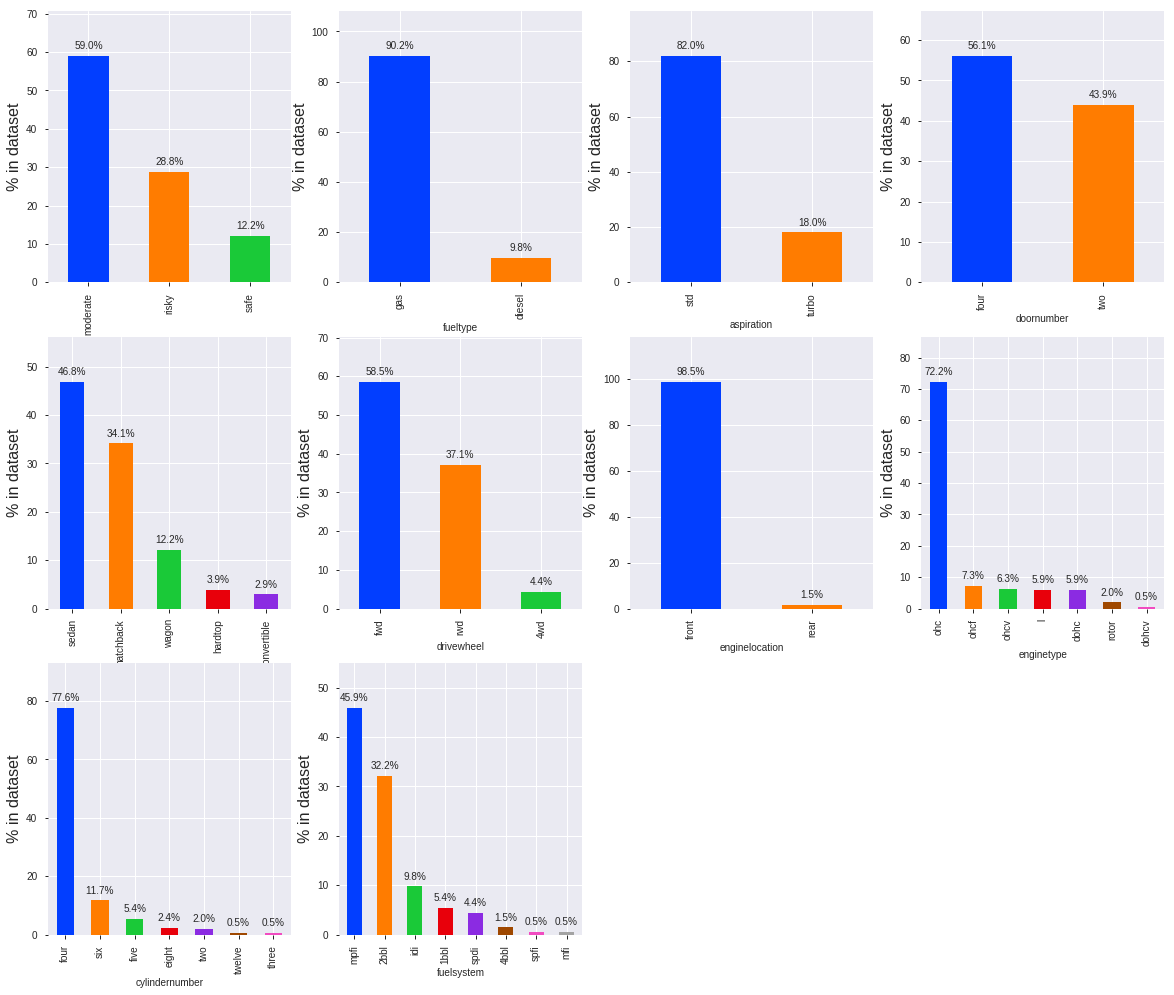

In [21]:
#plotting market percentage of car's with respect to features
plt.figure(figsize=(20, 17))
plot(car,cat_vars[:-1])


We can see that some of the car features are popular in the US Automobile Market. Geely Automotives can consider these analysis results to satisfy the market needs and make the required changes to their manufacturing line. 


* symboling: moderate (0,1)
* Carbody: Sedan
* fueltype: gas
* aspiration: standard
* doornumbers: four
* drivewheel: forward
* engine location: front
* engine type: ohc
* cylinderNumber: four
* fuelSystem: mpfi

Let us see that which company most popular in the US Automobile Market


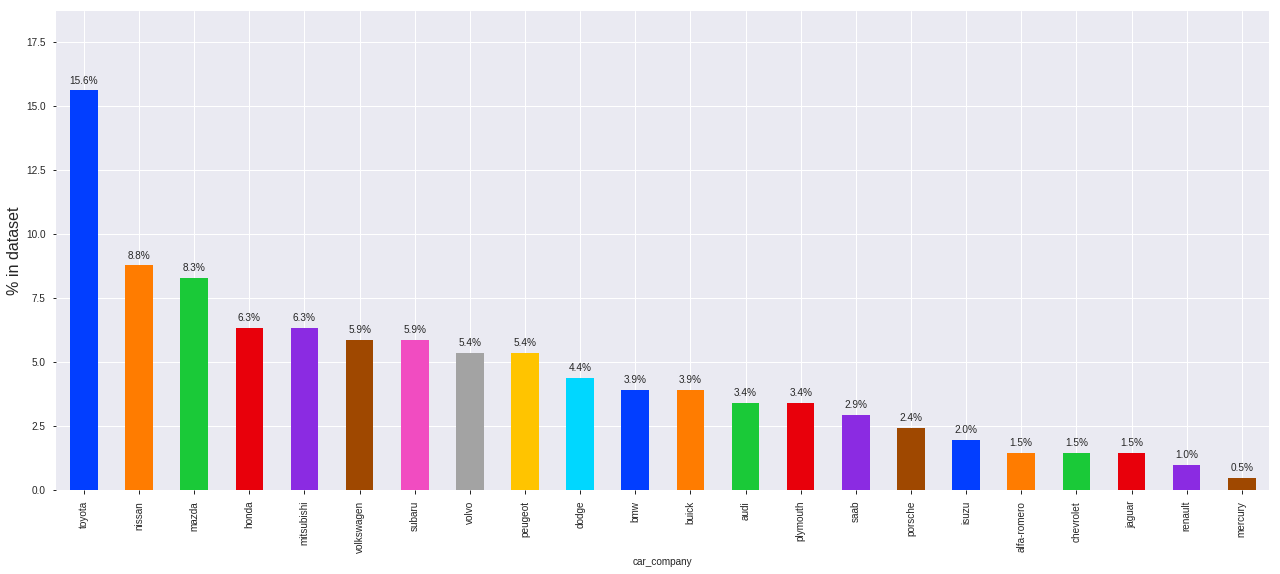

In [22]:
plt.figure(figsize=(100, 30))
plot(car,[cat_vars[-1]])

We can clearly see that <b>Toyota</b> clearly dominates with 15.6%.

This is in turn followed by:
 * Nissan with 8.8%
 * Mazda with 8.2%
 * Mitsubishi and Honda are equally popular with 6.3% market percentage.

Let's see how these categorical variables relate individually with <b>price</b>.


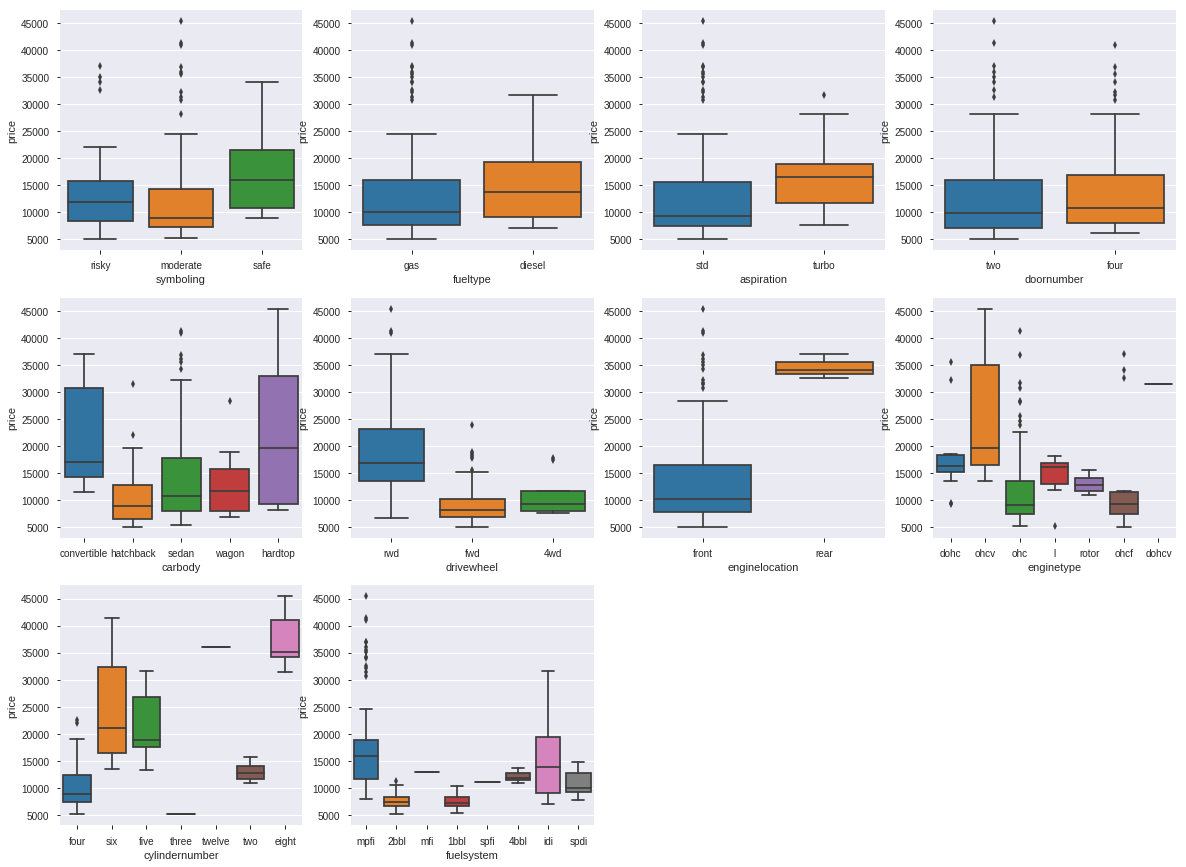

In [23]:
# ploting all the attributes excluding car_company against price
plot_cat(cat_vars[:-1])



</b>INSIGHTS:</b>

* <b>The fuel type</b> tends to have an effect on the price of the cars. 
* <b>enginelocation</b> and <b>aspiration</b> have a significant affect on the pricing of the car.
* The price of <b>real wheel drive</b> is quite higher that other drivewheel options.
* <b>cylindernumber</b> and <b>engine type</b> also seem to regulate the price of cars.
* We also observe that <b>hardtop</b> and <b>convertables<b> cars are priced quite higher than the other body types.

Let us see how the prices vary with numerous automobile companies in the US market.

Average US car price:  13276.710570731706
car_company
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818
Name: price, dtype: float64


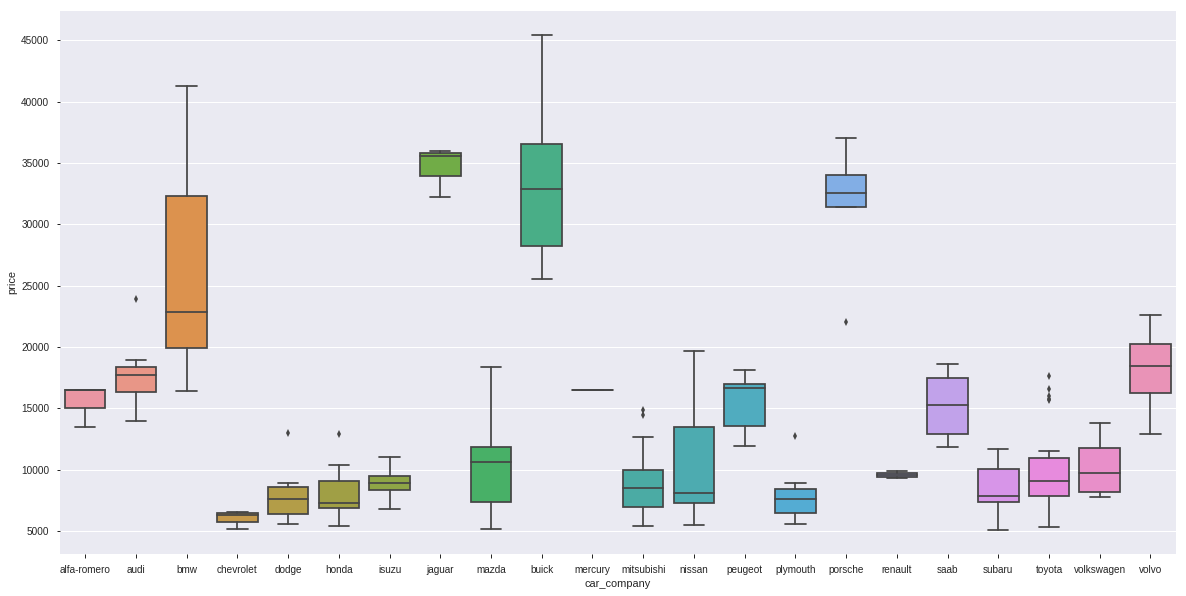

In [30]:
plt.figure(figsize=(20,10))
sns.boxplot(x = cat_vars[-1], y = 'price', data = car)

print('Average US car price: ',car['price'].mean())
print(car.groupby('car_company').price.mean().sort_values(ascending=False).head())


<b>INSIGHTS</b>:

* There are some outliers for the companies which demonstrates that they do manufacture some expensive cars that are priced above their usual market pricing range.
* Cars manufacturers like <b>Jaguar, Buick, Porsche, BMW and Volo</b> are on the high end side and are priced well above the other US cars which have an average price of approx. $13,000.
* Also, <b>company name</b> shows some affect on the price determination.


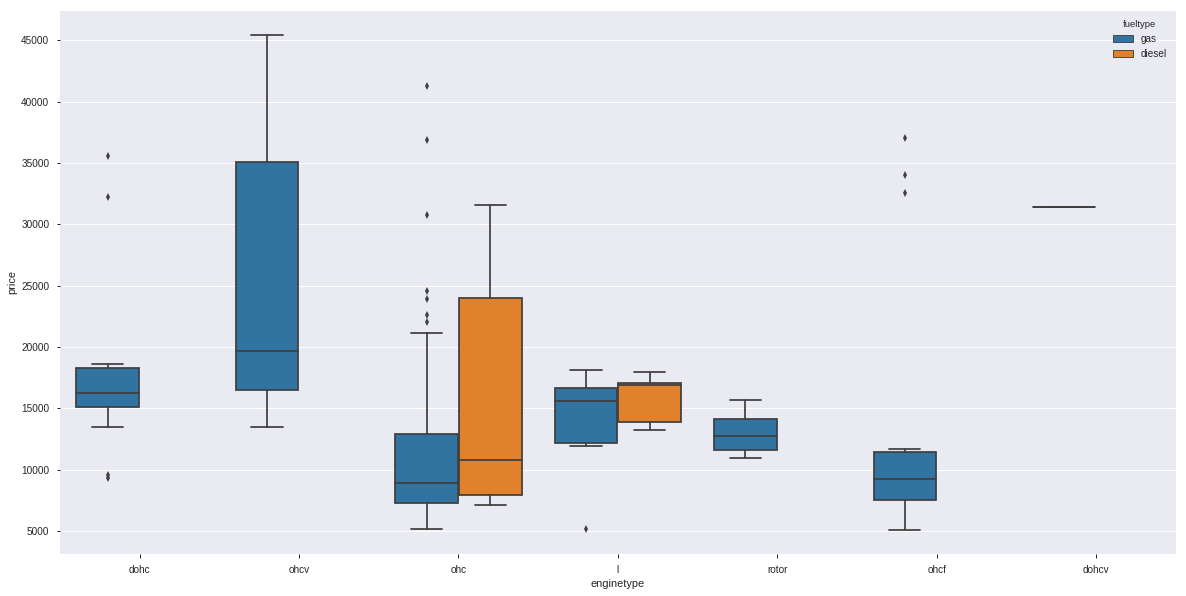

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(x='enginetype', y='price', hue = 'fueltype', data=car)


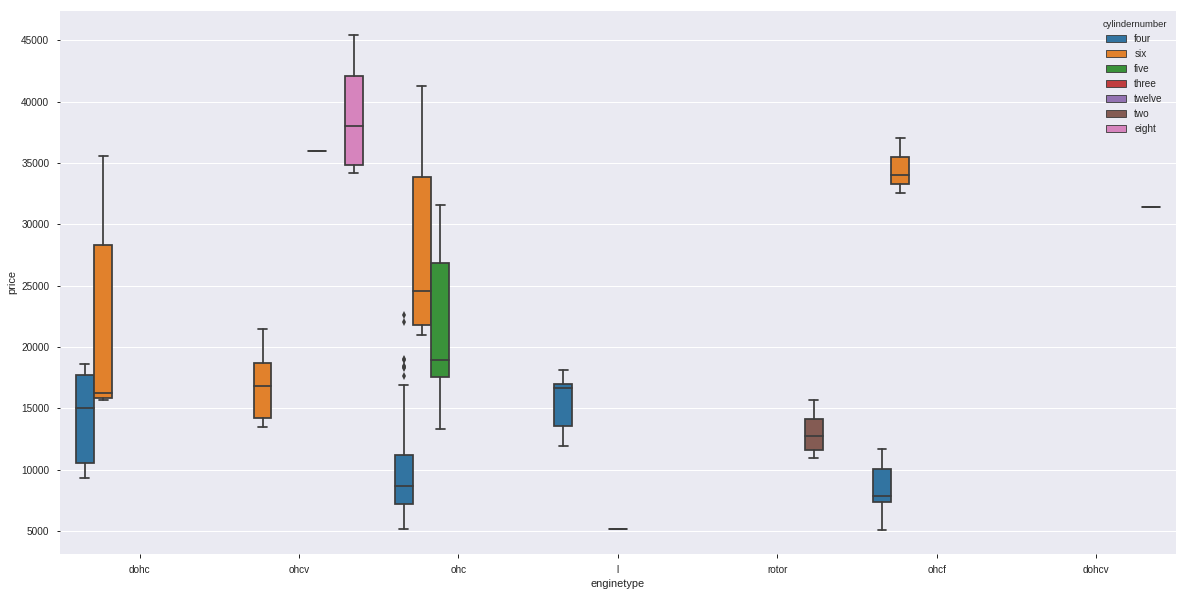

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(x='enginetype', y='price', hue = 'cylindernumber', data=car)


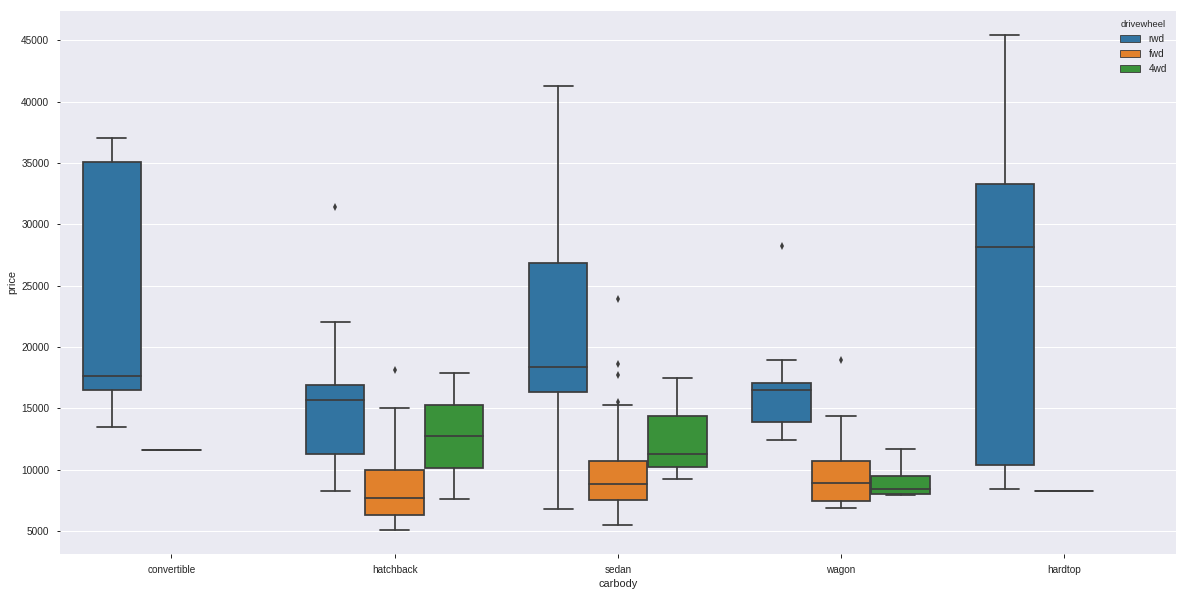

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(x='carbody', y='price', hue = 'drivewheel', data=car)


### Outlier treatment

It is extremely necessary that we treat the outliers before modeling as Linear Regression is sensitive to outliers.


In [28]:
numeric_variables = list(car.columns[car.dtypes != 'object'])
print(numeric_variables)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


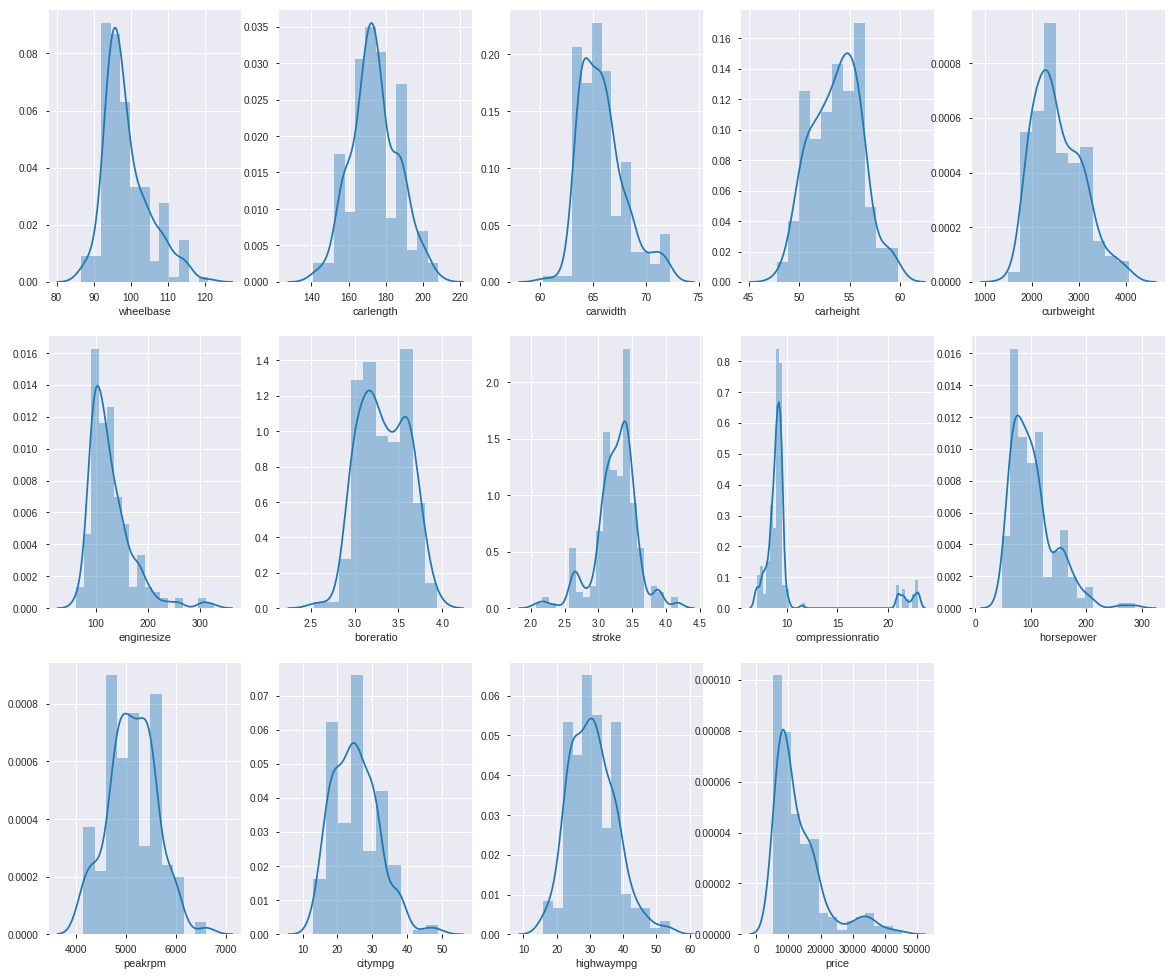

In [29]:
plt.figure(figsize=(20, 17))
plt.subplot(3,5,1)
sns.distplot(car['wheelbase'])
plt.subplot(3,5,2)
sns.distplot(car['carlength'])
plt.subplot(3,5,3)
sns.distplot(car['carwidth'])
plt.subplot(3,5,4)
sns.distplot(car['carheight'])
plt.subplot(3,5,5)
sns.distplot(car['curbweight'])
plt.subplot(3,5,6)
sns.distplot(car['enginesize'])
plt.subplot(3,5,7)
sns.distplot(car['boreratio'])
plt.subplot(3,5,8)
sns.distplot(car['stroke'])
plt.subplot(3,5,9)
sns.distplot(car['compressionratio'])
plt.subplot(3,5,10)
sns.distplot(car['horsepower'])
plt.subplot(3,5,11)
sns.distplot(car['peakrpm'])
plt.subplot(3,5,12)
sns.distplot(car['citympg'])
plt.subplot(3,5,13)
sns.distplot(car['highwaympg'])
plt.subplot(3,5,14)
sns.distplot(car['price'])


<b>INSIGHT:</b>

We notice that <b>enginesize, horsepower</b> and <b>compression ratio</b> variables tend to have a right skewed distribution which is probably due to the presence of the outliers


In [32]:
print(car[['horsepower','curbweight','enginesize']].quantile([0.01, .96]))
print(car[['compressionratio']].quantile([0.01, .90]))

      horsepower  curbweight  enginesize
0.01       52.12     1819.72        70.0
0.96      182.00     3657.80       209.0
      compressionratio
0.01              7.00
0.90             10.94


I decide to treat the outliers by clipping the variables <b>curbweight, horsepower, enginesize</b> at 96 precentile value. And clip <b>compressionratio</b> at 90 percentile value

In [33]:
# Outliers in the price of cars
car['horsepower'][np.abs(car['horsepower'] > 182.00)]= 182.00
car['horsepower'][np.abs(car['horsepower'] > 3657.80)]= 3657.80
car['enginesize'][np.abs(car['enginesize'] > 209.00)]= 209.00
car['compressionratio'][np.abs(car['compressionratio'] > 10.94)]= 10.94

Let us preserve the data for which the price is less than 3 standard deviation.

In [34]:
car = car[np.abs(car.price-car.price.mean()) <= (3*car.price.std())]

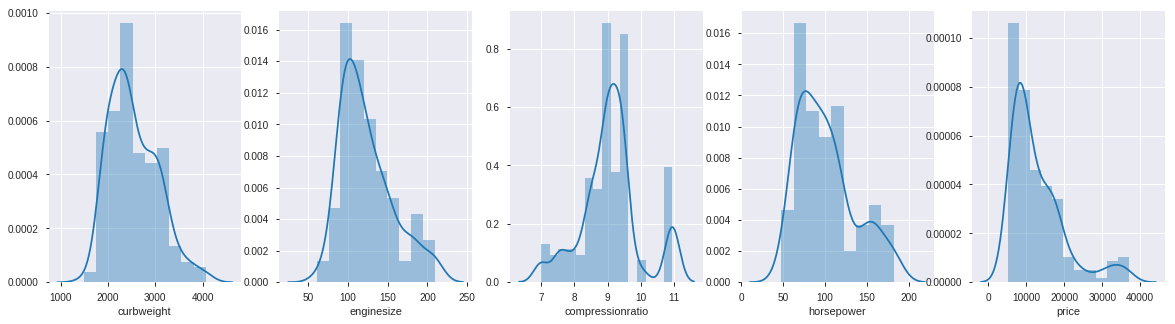

In [35]:
plt.figure(figsize=(20, 5))
plt.subplot(1,5,1)
sns.distplot(car['curbweight'])
plt.subplot(1,5,2)
sns.distplot(car['enginesize'])
plt.subplot(1,5,3)
sns.distplot(car['compressionratio'])
plt.subplot(1,5,4)
sns.distplot(car['horsepower'])
plt.subplot(1,5,5)
sns.distplot(car['price'])



### Creating fresh variables

This will be acting as an aid to remove corelated variables.

Earlier, from the scatter plot and the heatmap, we noticed there is a high correlation between <b>carlength, wheelbase, car width, car weight</b> and <b>city/highway mpg's</b>. 
Let us create new variables from these to try reducing the multicollinearlity.


In [36]:
car['car_lw_ratio'] = car.carlength/car.carwidth
car['car_wh_ratio'] = car.carwidth/car.carheight
car['pw_ratio'] = car.horsepower/car.curbweight
car['hc_mpg_ratio'] = car.highwaympg/car.citympg

## dropping the orignal variables
car.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)



We saw that the company brand value also is determinig the price of the car. Let us create a <b>company_seg</b> categorical variable which would tell us that under which segment tier does the <b>car_company</b> comes under.
We will segment the car companies based on the mean company price as

* <b>lowtier</b> if company mean price is below 10,000
* <b>midtier</b> if company mean price is above 10,000 and below 20,000
* <b>hightier</b> if company mean price is above 20,000



In [37]:
car.groupby('car_company').price.mean().sort_values(ascending=False)

car_company
jaguar         34600.000000
porsche        31400.500000
buick          30469.333333
bmw            23947.857143
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [38]:
company_seg_dict = {
    'cheverolet' : 'lowtier',
    'dodge' : 'lowtier',
    'plymouth' : 'lowtier',
    'honda' : 'lowtier',
    'subaru' : 'lowtier',
    'isuzu' : 'lowtier',
    'mitsubishi' : 'lowtier',
    'renault' : 'lowtier',
    'toyota' : 'lowtier',
    'volkswagen' : 'midtier',
    'nissan' : 'midtier',
    'mazda' : 'midtier',
    'saab' : 'midtier',
    'peugeot' : 'midtier',
    'alfa-romero' : 'midtier',
    'mercury' : 'midtier',
    'audi' : 'midtier',
    'volvo' : 'midtier',
    'bmw' : 'hightier',
    'buick' : 'hightier',
    'porsche' : 'hightier',
    'jaguar' : 'hightier',
    }
car['company_seg'] = car['car_company'].map(company_seg_dict)
# Dropping the orignal car_company variable
car.drop('car_company',axis=1,inplace=True)
car.head()



symboling fueltype aspiration doornumber      carbody drivewheel  \
0     risky      gas        std        two  convertible        rwd   
1     risky      gas        std        two  convertible        rwd   
2  moderate      gas        std        two    hatchback        rwd   
3     risky      gas        std       four        sedan        fwd   
4     risky      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  curbweight enginetype  ... stroke  \
0          front       88.6        2548       dohc  ...   2.68   
1          front       88.6        2548       dohc  ...   2.68   
2          front       94.5        2823       ohcv  ...   3.47   
3          front       99.8        2337        ohc  ...   3.40   
4          front       99.4        2824        ohc  ...   3.40   

   compressionratio horsepower  peakrpm    price  car_lw_ratio  car_wh_ratio  \
0               9.0        111     5000  13495.0      2.633385      1.313525   
1               9.0        111     5000  16500.0      2.633385      1.313525   
2               9.0        154     5000  16500.0      2.613740      1.250000   
3              10.0        102     5500  13950.0      2.667674      1.219153   
4               8.0        115     5500  17450.0      2.659639      1.222836   

   pw_ratio  hc_mpg_ratio  company_seg  
0  0.043564      1.285714      midtier  
1  0.043564      1.285714      midtier  
2  0.054552      1.368421      midtier  
3  0.043646      1.250000      midtier  
4  0.040722      1.222222      midtier  

[5 rows x 24 columns]

In [39]:
car.groupby('company_seg').price.mean()

company_seg
hightier    29107.309524
lowtier      8987.369565
midtier     13231.839151
Name: price, dtype: float64

#### Handling Categorical Variable for Linear Regression

In [40]:
# Converting categorical variables with two levels to either 1 or 0
car['fueltype'] = car['fueltype'].map({'gas': 1, 'diesel': 0})
car['aspiration'] = car['aspiration'].map({'std': 1, 'turbo': 0})
car['doornumber'] = car['doornumber'].map({'two': 1, 'four': 0})
car['enginelocation'] = car['enginelocation'].map({'front': 1, 'rear': 0})
car.head()

symboling  fueltype  aspiration  doornumber      carbody drivewheel  \
0     risky         1           1           1  convertible        rwd   
1     risky         1           1           1  convertible        rwd   
2  moderate         1           1           1    hatchback        rwd   
3     risky         1           1           0        sedan        fwd   
4     risky         1           1           0        sedan        4wd   

   enginelocation  wheelbase  curbweight enginetype  ... stroke  \
0               1       88.6        2548       dohc  ...   2.68   
1               1       88.6        2548       dohc  ...   2.68   
2               1       94.5        2823       ohcv  ...   3.47   
3               1       99.8        2337        ohc  ...   3.40   
4               1       99.4        2824        ohc  ...   3.40   

   compressionratio horsepower  peakrpm    price  car_lw_ratio  car_wh_ratio  \
0               9.0        111     5000  13495.0      2.633385      1.313525   
1               9.0        111     5000  16500.0      2.633385      1.313525   
2               9.0        154     5000  16500.0      2.613740      1.250000   
3              10.0        102     5500  13950.0      2.667674      1.219153   
4               8.0        115     5500  17450.0      2.659639      1.222836   

   pw_ratio  hc_mpg_ratio  company_seg  
0  0.043564      1.285714      midtier  
1  0.043564      1.285714      midtier  
2  0.054552      1.368421      midtier  
3  0.043646      1.250000      midtier  
4  0.040722      1.222222      midtier  

[5 rows x 24 columns]

In [41]:
# Creating dummy variables
df = pd.get_dummies(car)

# Droping 1 dummy variable and Keeping n-1 variables for each feature 
df.drop(['symboling_risky',
         'carbody_hatchback',
         'drivewheel_4wd',
         'enginetype_l',
         'cylindernumber_three',
         'fuelsystem_1bbl',
         'company_seg_lowtier'],axis=1,inplace=True)
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'car_lw_ratio', 'car_wh_ratio',
       'pw_ratio', 'hc_mpg_ratio', 'symboling_moderate', 'symboling_safe',
       'carbody_convertible', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'company_seg_hightier', 'company_seg_midtier'],
      dtype='object')

#### Splitting Dataset into Training/Test set

In [42]:
# Splitting the avilable data into training and testing set.

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Scaling of Features

In [43]:
# Scaling all the numeric variables in the same scale between 0 and 1.
scaler = MinMaxScaler()

In [44]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','car_lw_ratio','car_wh_ratio','pw_ratio','hc_mpg_ratio','stroke','compressionratio','peakrpm','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

fueltype  aspiration  doornumber  enginelocation  wheelbase  curbweight  \
1           1           1           1               1   0.068966    0.411171   
165         1           1           1               1   0.272414    0.301396   
197         1           1           0               1   0.610345    0.602793   
169         1           1           1               1   0.406897    0.412335   
190         1           1           1               1   0.272414    0.284329   

     enginesize  boreratio    stroke  compressionratio  ...  \
1      0.466216   0.664286  0.290476          0.507614  ...   
165    0.250000   0.500000  0.480952          0.609137  ...   
197    0.540541   0.885714  0.514286          0.634518  ...   
169    0.574324   0.771429  0.680952          0.583756  ...   
190    0.324324   0.464286  0.633333          0.380711  ...   

     cylindernumber_two  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
1                     0                0                0               0   
165                   0                0                0               0   
197                   0                0                0               0   
169                   0                0                0               0   
190                   0                0                0               0   

     fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
1                 0                1                0                0   
165               0                1                0                0   
197               0                1                0                0   
169               0                1                0                0   
190               0                1                0                0   

     company_seg_hightier  company_seg_midtier  
1                       0                    1  
165                     0                    0  
197                     0                    1  
169                     0                    0  
190                     0                    1  

[5 rows x 46 columns]

In [45]:
df_train.describe()

fueltype  aspiration  doornumber  enginelocation   wheelbase  \
count  141.000000  141.000000  141.000000      141.000000  141.000000   
mean     0.886525    0.794326    0.439716        0.985816    0.413402   
std      0.318304    0.405634    0.498122        0.118672    0.198892   
min      0.000000    0.000000    0.000000        0.000000    0.000000   
25%      1.000000    1.000000    0.000000        1.000000    0.272414   
50%      1.000000    1.000000    0.000000        1.000000    0.358621   
75%      1.000000    1.000000    1.000000        1.000000    0.503448   
max      1.000000    1.000000    1.000000        1.000000    1.000000   

       curbweight  enginesize   boreratio      stroke  compressionratio  ...  \
count  141.000000  141.000000  141.000000  141.000000        141.000000  ...   
mean     0.411779    0.420979    0.559980    0.551570          0.536415  ...   
std      0.198452    0.225970    0.192528    0.150278          0.229812  ...   
min      0.000000    0.000000    0.000000    0.000000          0.000000  ...   
25%      0.254849    0.243243    0.421429    0.490476          0.406091  ...   
50%      0.359193    0.337838    0.550000    0.571429          0.507614  ...   
75%      0.552366    0.540541    0.742857    0.633333          0.609137  ...   
max      1.000000    1.000000    1.000000    1.000000          1.000000  ...   

       cylindernumber_two  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
count          141.000000       141.000000       141.000000      141.000000   
mean             0.028369         0.333333         0.021277        0.113475   
std              0.166616         0.473085         0.144819        0.318304   
min              0.000000         0.000000         0.000000        0.000000   
25%              0.000000         0.000000         0.000000        0.000000   
50%              0.000000         0.000000         0.000000        0.000000   
75%              0.000000         1.000000         0.000000        0.000000   
max              1.000000         1.000000         1.000000        1.000000   

       fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
count           141.0       141.000000       141.000000       141.000000   
mean              0.0         0.425532         0.042553         0.007092   
std               0.0         0.496186         0.202567         0.084215   
min               0.0         0.000000         0.000000         0.000000   
25%               0.0         0.000000         0.000000         0.000000   
50%               0.0         0.000000         0.000000         0.000000   
75%               0.0         1.000000         0.000000         0.000000   
max               0.0         1.000000         1.000000         1.000000   

       company_seg_hightier  company_seg_midtier  
count            141.000000           141.000000  
mean               0.106383             0.468085  
std                0.309426             0.500759  
min                0.000000             0.000000  
25%                0.000000             0.000000  
50%                0.000000             0.000000  
75%                0.000000             1.000000  
max                1.000000             1.000000  

[8 rows x 46 columns]

In [46]:
y_train = df_train.pop('price')
X_train = df_train

### Building our model

Let us follow a mixed approach. 
1. Initially, we shall use the LinearRegression function from SciKit Learn for its compatibility with RFE.
2. Then we will be using the statsmodels for statistics analysis of the model


In [47]:
# Running RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15) # running RFE and selecting  best 15 features for describing the price of cars
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 15),
 ('aspiration', False, 9),
 ('doornumber', False, 24),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', False, 30),
 ('enginesize', False, 8),
 ('boreratio', False, 6),
 ('stroke', True, 1),
 ('compressionratio', False, 11),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('car_lw_ratio', True, 1),
 ('car_wh_ratio', True, 1),
 ('pw_ratio', True, 1),
 ('hc_mpg_ratio', False, 22),
 ('symboling_moderate', False, 28),
 ('symboling_safe', False, 27),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 21),
 ('carbody_sedan', False, 17),
 ('carbody_wagon', False, 25),
 ('drivewheel_fwd', False, 29),
 ('drivewheel_rwd', False, 26),
 ('enginetype_dohc', False, 3),
 ('enginetype_dohcv', False, 2),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 4),
 ('enginetype_ohcv', False, 12),
 ('enginetype_rotor', False, 16),
 ('cylindernumber_eight', False, 13),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('c

In [49]:
cols = X_train.columns[rfe.support_]
cols

Index(['enginelocation', 'wheelbase', 'stroke', 'horsepower', 'peakrpm',
       'car_lw_ratio', 'car_wh_ratio', 'pw_ratio', 'carbody_convertible',
       'enginetype_ohc', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_4bbl', 'company_seg_hightier'],
      dtype='object')

In [50]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'curbweight', 'enginesize',
       'boreratio', 'compressionratio', 'hc_mpg_ratio', 'symboling_moderate',
       'symboling_safe', 'carbody_hardtop', 'carbody_sedan', 'carbody_wagon',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'company_seg_midtier'],
      dtype='object')


### Now, Building model using statsmodels library, for the detailed statistics

In [51]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [52]:
lm=fit_LR(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     173.0
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           6.66e-76
Time:                        01:32:21   Log-Likelihood:                 225.25
No. Observations:                 141   AIC:                            -418.5
Df Residuals:                     125   BIC:                            -371.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5136 

<b>fuelsystem_4bbl</b> has <b>p-value > 0.05</b>. Let's drop it.

In [53]:
X_train1 = X_train_rfe.drop('fuelsystem_4bbl', axis=1)


In [54]:
lm1=fit_LR(X_train1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     184.9
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           8.94e-77
Time:                        01:32:21   Log-Likelihood:                 224.55
No. Observations:                 141   AIC:                            -419.1
Df Residuals:                     126   BIC:                            -374.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5018 

<b>cylindernumber_five</b> has <b>p-value > 0.05.</b>  Let's drop it.

In [55]:
X_train2 = X_train1.drop('cylindernumber_five', axis=1)

In [56]:
lm2=fit_LR(X_train2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     198.3
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.28e-77
Time:                        01:32:22   Log-Likelihood:                 223.74
No. Observations:                 141   AIC:                            -419.5
Df Residuals:                     127   BIC:                            -378.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4708 

<b>cylindernumber_six</b> has <b>p-value > 0.05</b>. Let's drop it.

In [57]:
X_train3 = X_train2.drop('cylindernumber_six', axis=1)

In [58]:
lm3=fit_LR(X_train3)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     215.5
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.14e-78
Time:                        01:32:22   Log-Likelihood:                 223.41
No. Observations:                 141   AIC:                            -420.8
Df Residuals:                     128   BIC:                            -382.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4596 

<b>car_lw_ratio</b> is having a high VIF and is highly correlated to </b>wheelbase</b> as well as slightly correlated with <b>horsepower</b>. Let's remove this one too.

In [59]:
X_train4 = X_train3.drop('car_lw_ratio', axis=1)

In [60]:
lm4=fit_LR(X_train4)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     231.6
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           2.88e-79
Time:                        01:32:22   Log-Likelihood:                 221.89
No. Observations:                 141   AIC:                            -419.8
Df Residuals:                     129   BIC:                            -384.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4182 

In [61]:
VIF_get(X_train4)

Features    VIF
6               pw_ratio  64.08
3             horsepower  51.53
0         enginelocation  44.23
2                 stroke  20.76
1              wheelbase  19.57
5           car_wh_ratio  13.32
4                peakrpm   8.18
9    cylindernumber_four   8.00
8         enginetype_ohc   5.81
10  company_seg_hightier   1.90
7    carbody_convertible   1.28

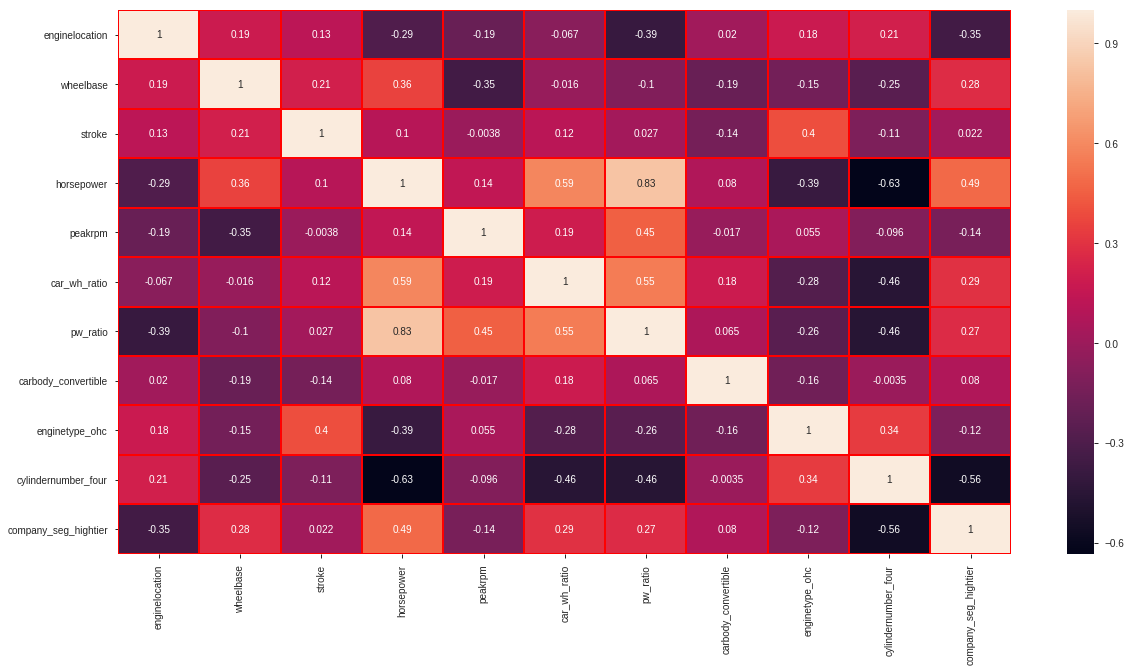

In [62]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train4.corr(),annot = True, linewidths=1, linecolor='r')


* Removal of <b>car_lw_ratio</b> had no impact on the Adjusted R-Squared.
* <b>pw_ratio</b> possesses the highest VIF and is strongly corelated with <b>horsepower</b>, <b>car_wh_ratio</b> and <b>peakrpm</b>. Let's remove this one too.



In [63]:
X_train5 = X_train4.drop('pw_ratio', axis=1)

In [64]:
lm5=fit_LR(X_train5)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     175.7
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           2.00e-70
Time:                        01:32:23   Log-Likelihood:                 196.68
No. Observations:                 141   AIC:                            -371.4
Df Residuals:                     130   BIC:                            -338.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2578 

In [65]:
VIF_get(X_train5)

Features    VIF
0        enginelocation  38.13
2                stroke  20.64
5          car_wh_ratio  13.21
1             wheelbase  10.90
3            horsepower   9.91
8   cylindernumber_four   7.29
4               peakrpm   6.08
7        enginetype_ohc   5.80
9  company_seg_hightier   1.90
6   carbody_convertible   1.20

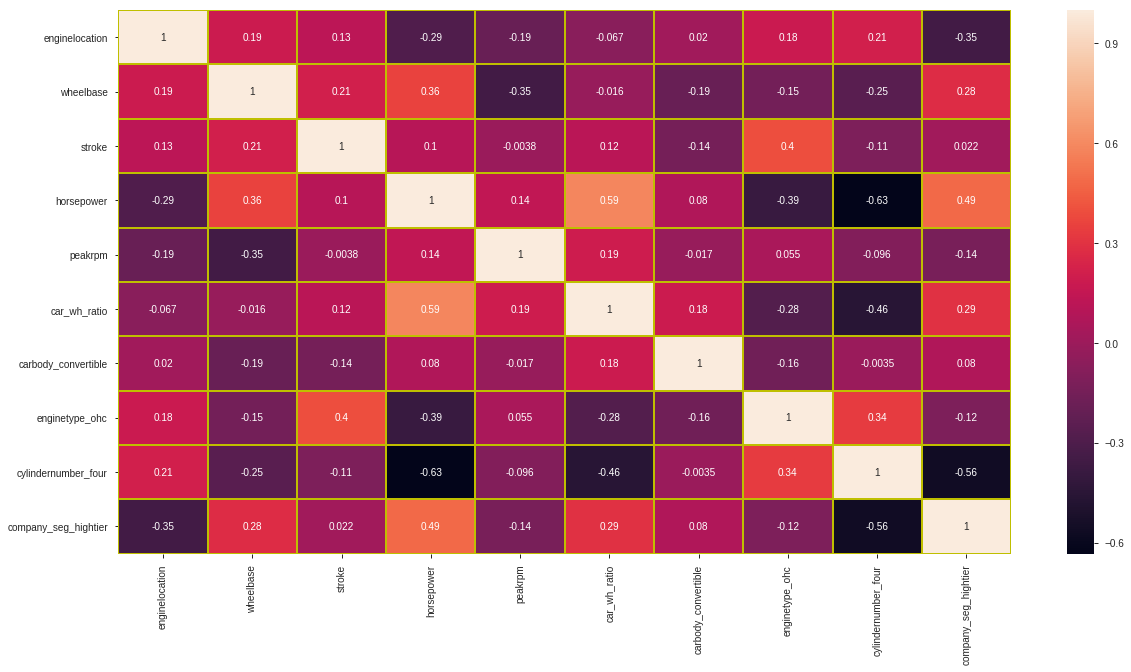

In [66]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train5.corr(),annot = True,linewidths=1,linecolor='y')

* Removal of <b>pw_ratio</b> reduced the Adjusted R-Squared to 0.926(not much)
* <b>peakrpm</b> is having high p-value. Let us remove this one.



In [67]:
X_train6 = X_train5.drop('peakrpm', axis=1)

In [68]:
lm6=fit_LR(X_train6)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.40e-71
Time:                        01:32:24   Log-Likelihood:                 196.67
No. Observations:                 141   AIC:                            -373.3
Df Residuals:                     131   BIC:                            -343.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2612 

* enginetype_ohc is having p-value > 0.05, making it insignificant in the model. Let's remove this.

In [69]:
X_train7 = X_train6.drop('enginetype_ohc', axis=1)

In [70]:
lm7=fit_LR(X_train7)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     217.7
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           3.82e-72
Time:                        01:32:24   Log-Likelihood:                 195.12
No. Observations:                 141   AIC:                            -372.2
Df Residuals:                     132   BIC:                            -345.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2495 

* <b>stroke</b> is having <b>p-value > 0.05</b> . Let us remove this.

In [71]:
X_train8 = X_train7.drop('stroke', axis=1)

In [72]:
lm8=fit_LR(X_train8)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     247.0
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           5.81e-73
Time:                        01:32:25   Log-Likelihood:                 194.15
No. Observations:                 141   AIC:                            -372.3
Df Residuals:                     133   BIC:                            -348.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2315 

In [73]:
VIF_get(X_train8)

Features    VIF
0        enginelocation  26.46
3          car_wh_ratio  12.55
1             wheelbase   8.74
2            horsepower   8.37
5   cylindernumber_four   6.89
6  company_seg_hightier   1.72
4   carbody_convertible   1.13

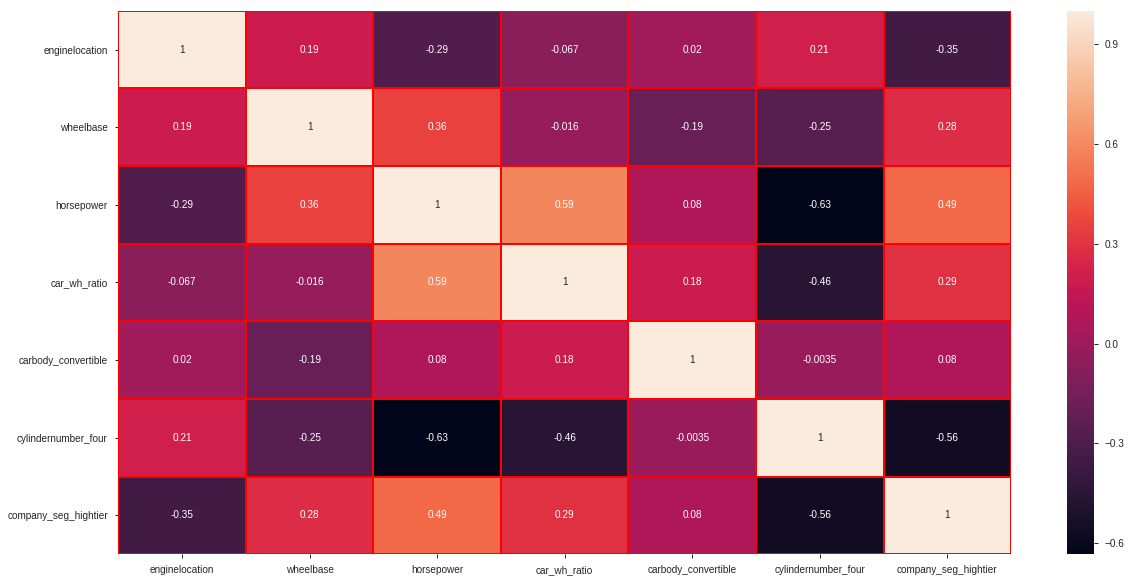

In [74]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train8.corr(),annot = True, linewidths=1, linecolor='r')

* <b>enginelocation</b> is having the highest VIF. Let's remove this one also.

In [75]:
X_train9 = X_train8.drop('enginelocation', axis=1)

In [76]:
lm9=fit_LR(X_train9)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     231.4
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           3.82e-68
Time:                        01:32:26   Log-Likelihood:                 179.41
No. Observations:                 141   AIC:                            -344.8
Df Residuals:                     134   BIC:                            -324.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0431 

In [77]:
VIF_get(X_train9)

Features   VIF
1            horsepower  8.35
2          car_wh_ratio  8.05
0             wheelbase  5.76
4   cylindernumber_four  3.63
5  company_seg_hightier  1.72
3   carbody_convertible  1.13

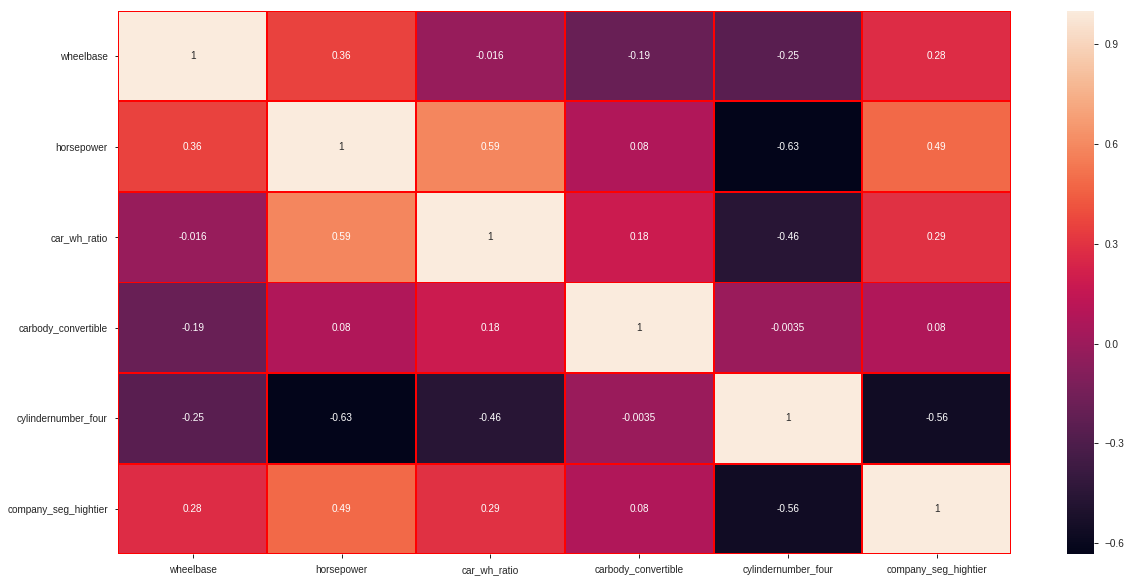

In [78]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train9.corr(),annot = True, linecolor='r', linewidths=1)

* removing <b>enginelocation</b> lowers the Adjusted R-Squared to 0.908 - Still a significant fit.
* <b>Horsepower</b> is more business significant in nature than <b>car_wh_ratio</b> which also has a high VIF. 


<b>car_wh_ratio</b> is correlated with <b>horsepower</b>. Let's remove <b>car_wh_ratio</b>.



In [79]:
X_train10 = X_train9.drop('car_wh_ratio', axis=1)
X_train10 = sm.add_constant(X_train10)
lm10 = sm.OLS(y_train,X_train10).fit() 
print(lm10.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     273.2
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           9.11e-69
Time:                        01:32:27   Log-Likelihood:                 177.91
No. Observations:                 141   AIC:                            -343.8
Df Residuals:                     135   BIC:                            -326.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0133 

In [80]:
VIF_get(X_train10)

Features    VIF
0                 const  19.89
4   cylindernumber_four   1.95
2            horsepower   1.89
5  company_seg_hightier   1.56
1             wheelbase   1.24
3   carbody_convertible   1.08

All the independent variable have considerably low VIF and the **Adj. R-Squared is 0.907**.

We will conclude with these variables as the final model predictor variables.

## Residual Analysis of the training dataset

In order to check whether the error terms are also normally distributed <b>(which is one of the major assumptions of linear regression)</b>, let us plot the histogram of the error terms and see what it looks like.


In [81]:
y_train_price = lm10.predict(X_train10)

Text(0.5, 0, 'Errors')

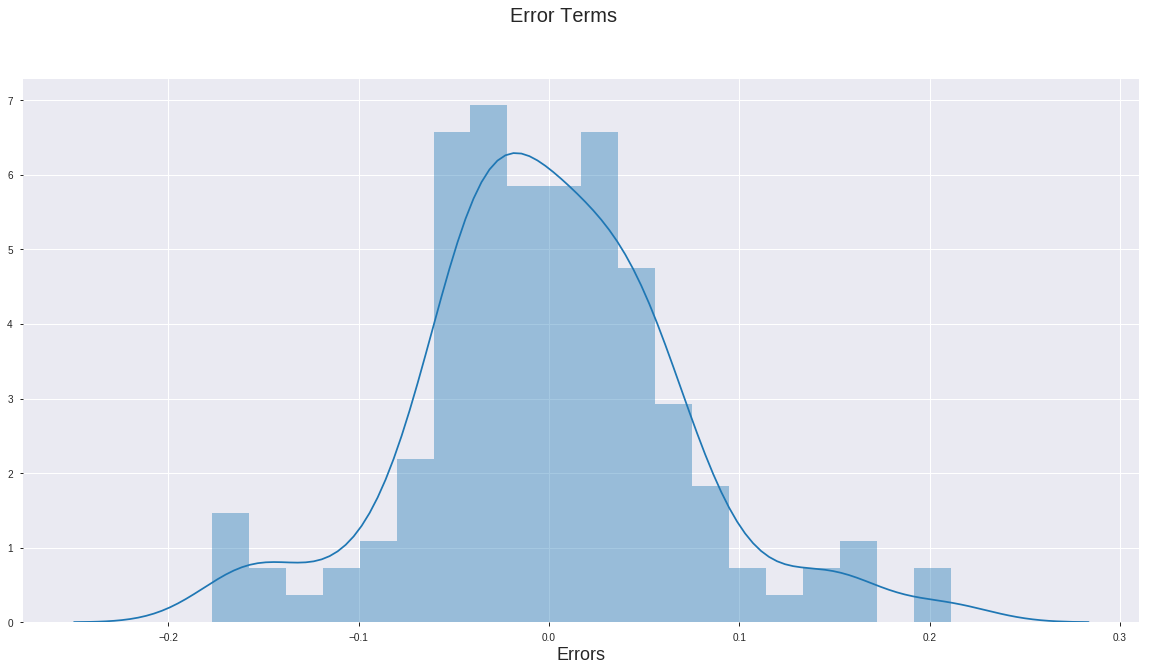

In [82]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(20, 10))
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  

## Making Predictions

Before making any inferences about the equation of the linear regression, let us test it on the test set.

In [83]:
num_vars=num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 
                     'boreratio','car_lw_ratio','car_wh_ratio','pw_ratio',
                     'hc_mpg_ratio','stroke','compressionratio','peakrpm',
                     'price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [84]:
y_test = df_test.pop('price')
X_test = df_test

In [85]:
# Creating X_test_new dataframe by dropping variables from X_test
X_train10= X_train10.drop(['const'], axis=1)
X_test_new = X_test[X_train10.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [86]:
y_pred = lm10.predict(X_test_new)

Text(0, 0.5, 'y_pred')

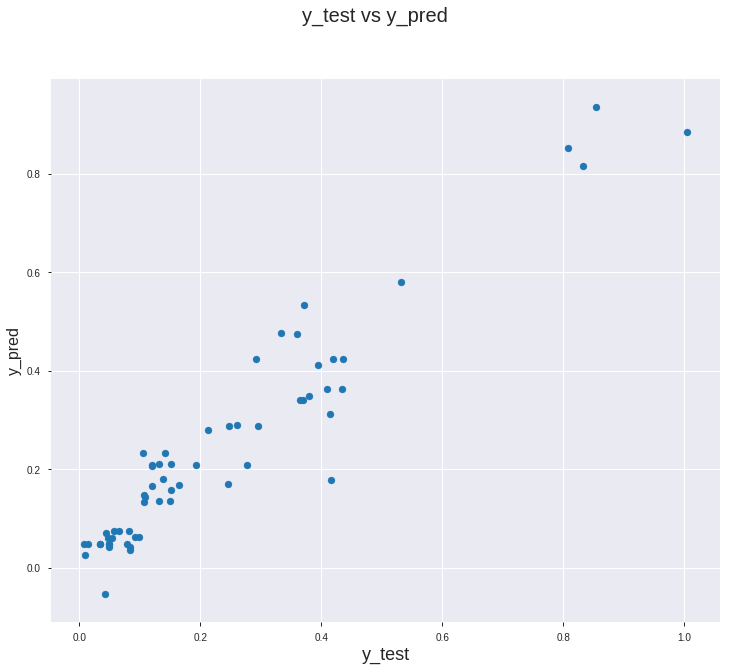

In [91]:
fig = plt.figure(figsize=(12,10))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)       

<b>y_test</b> vs <b>y_pred</b> is observed to be almost linear with few variations. Overall, it seems to be a pretty linear spread.


In [88]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)


# ****************************** CALCULATING THE R2 SCORE ****************************************
from sklearn.metrics import r2_score                                                             *
r02=r2_score(y_test, y_pred)                                                                     *
print('Model r2_score:',r2)                                                                      *
# ************************************************************************************************



Model RMSE: 0.0673924212933167
Model r2_score: 0.9056388935908385


<b>r2_score</b> on the <b>test data</b> is very close to the <b>trained Adjusted R-Squared value</b> of the model. 
We have a significantly <b>high r2_score</b> and a <b>low RMSE</b> of <b>0.067</b>.



### FINAL INFERENCE

Final inference from model evaluation is given as follows:

With a <b>low p-value</b> and <b>low VIF</b>, these variables do describe the price of the automobiles to a good extent.

Final predictors which can be proposed are given as:


| Predictor             | Coef   |  p-value |
|-----------------------|--------|----------|
|wheelbase              |0.3058  | 0.000    |   
|horsepower             |0.3750  | 0.000    |
|carbody_convertible    |0.1785  | 0.000    |   
|cylindernumber_four    |-0.0686 | 0.001    |
|cmpany_segment_hightier|0.3129  | 0.000    |   


Thus, the equation of our best fitted line:

****price = -0.0133 + 0.3058 x wheelbase + 0.3750 x horsepower + 0.1785 x carbody_convertible + -0.0686 x cylindernumber_four + 0.3129 x cmpany_segment_number****

 * The price of the car changes by **0.3058** for every unit change in the **wheelbase** dimension if all other variables are held constant. And so is true for all other variables.

* The predictor **carbody_convertible** suggest that the price of car increases by **0.1785** when the car body is convertible.
* The **cylinder_number_four** is the most commonly available feature in **77.6%** of the car data in USA and since having 4 cylinders is attributed with relatively low price, the coefficient for this variable is negative.
* The **company name** is also essential in determining the price of the automobile. High tier companies' names like BMW, Buik, Porsche and Jaguar further add up to the price by **0.3129**.


Overall we have a decent model with the following metrics as show below:

| Adjusted R-Squared|r2_score|Prob (F-Statistic)| AIC  | BIC  | RMSE |
|-------------------|--------|------------------|------|------|------|
|0.907              |0.905   | 9.11e-69         |-343.8|-326.1|0.067 | 


We have a couple of options:

*  choosing another set of variables to get a more normal distribution of error terms or use more useful variables like PWratio inplace of horsepower.
*  Build a non-linear model



In [31]:
# *******************************************************************
# End of assignment

# Compiled by :
# Prateek Ralhan
# *******************************************************************